# Customer Churn Modeling

### Loading Data 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Data Visulizatoin 

In [8]:
import plotly.graph_objects as go

In [12]:

labels = ["Remained", "Churned"]
values = df["Exited"].value_counts()

fig = go.Figure(data =[go.Pie(labels = labels, values = values, pull = [0,0.1])] )
fig.show()

- 20% of the customer Churn

In [14]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [27]:
plt.style.use('ggplot')

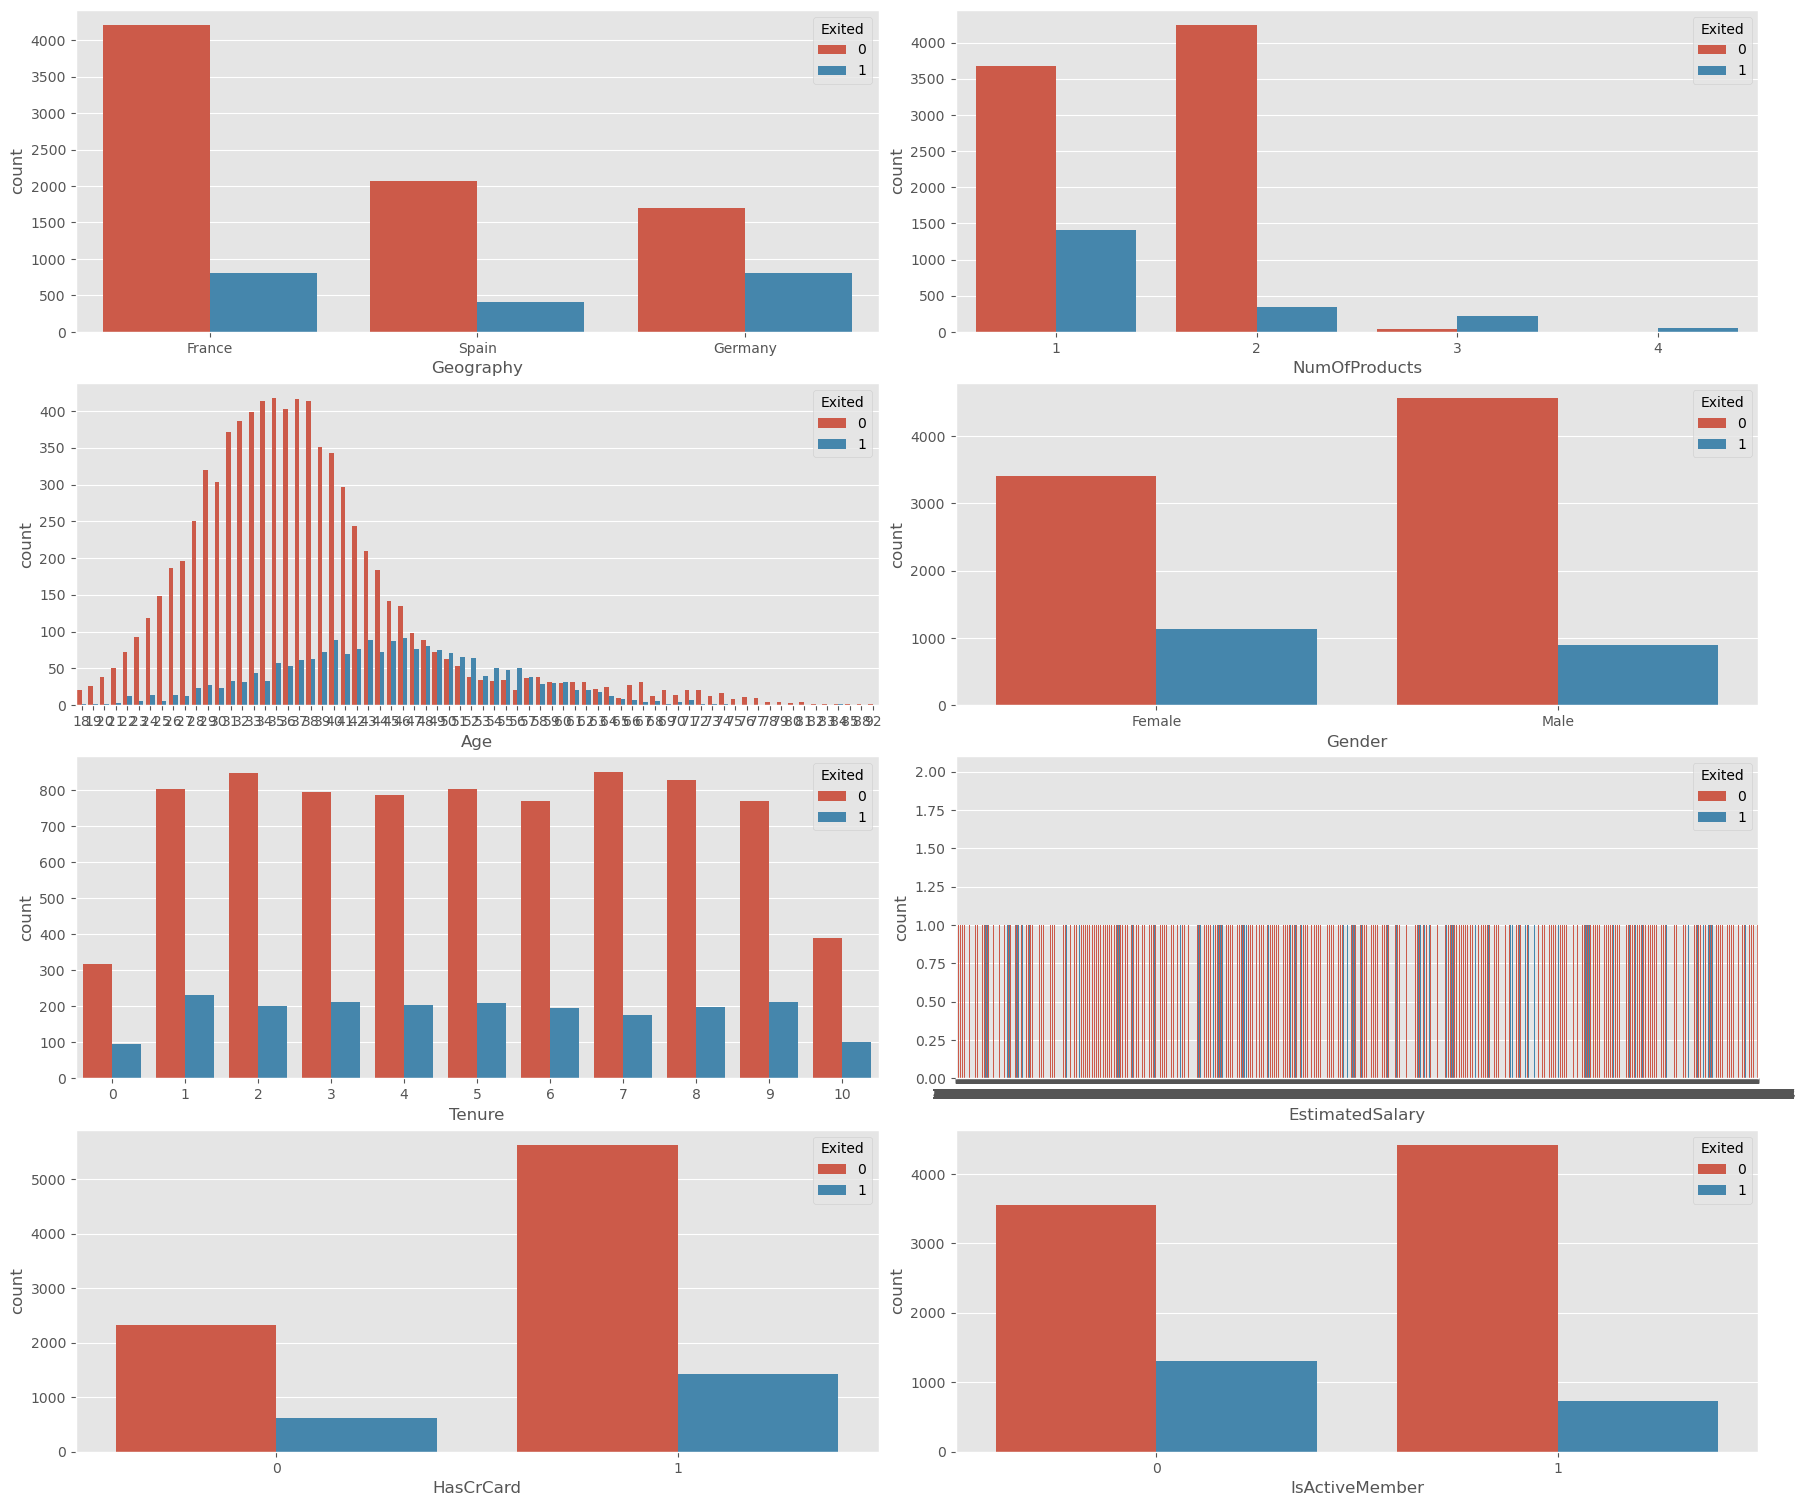

In [42]:
fig, ax = plt.subplots(4,2, figsize = (18,15))

sns.countplot(x = "Geography",  hue = 'Exited', data =df ,ax = ax[0][0] )
sns.countplot(x = "NumOfProducts",  hue = 'Exited', data =df ,ax = ax[0][1] )
sns.countplot(x = "Age",  hue = 'Exited', data =df ,ax = ax[1][0] )
sns.countplot(x = "Gender",  hue = 'Exited', data =df ,ax = ax[1][1] )
sns.countplot(x = "Tenure",  hue = 'Exited', data =df ,ax = ax[2][0] )
sns.countplot(x = "EstimatedSalary",  hue = 'Exited', data =df ,ax = ax[2][1] )
sns.countplot(x = "HasCrCard",  hue = 'Exited', data =df ,ax = ax[3][0] )
sns.countplot(x = "IsActiveMember",  hue = 'Exited', data =df ,ax = ax[3][1] )

plt.tight_layout(pad = 0.5)
plt.show()

- Germany has the highest Churn, although it is the smallest market its churn count exceeds France that almost twice the market size
- There is a higher rate of with female customers than male customers, Male customer account for 55% of the customer base there is higher churn with 11% of the female cusstomer existing compared to 9% of the male customers.
- There is higher churn for customers in 30s, while majority of the customer base is younger. 
- Customer with 2 products has the lowest churn at 3% and customer with 1 product have the highest churn at 14%. 
- Inactive customers have higher churn and inactive customer base is very high at 48.5% as a result have a higher churn. 
- There is high churn for customers with credit cards
- There does not appear to be a correlation between salary and churn

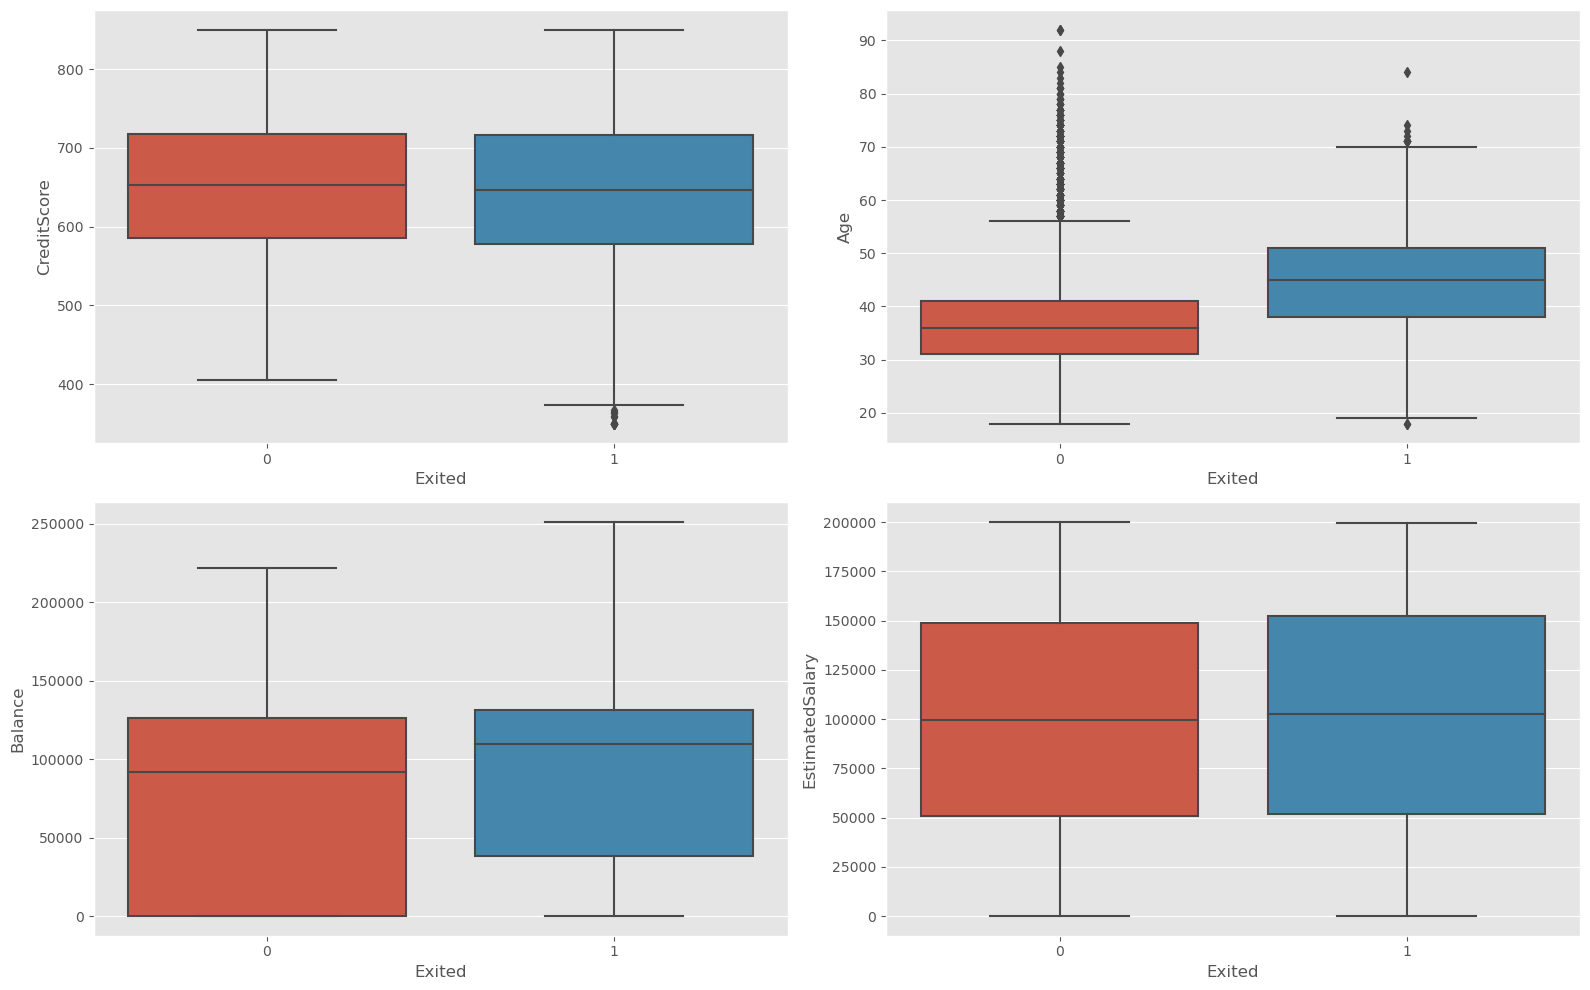

In [51]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1])

plt.tight_layout()
plt.show()

- Credit Score and customer salary do not effect if someone will churn 
- Customer with higher bank balance are more likely churn 

<AxesSubplot:>

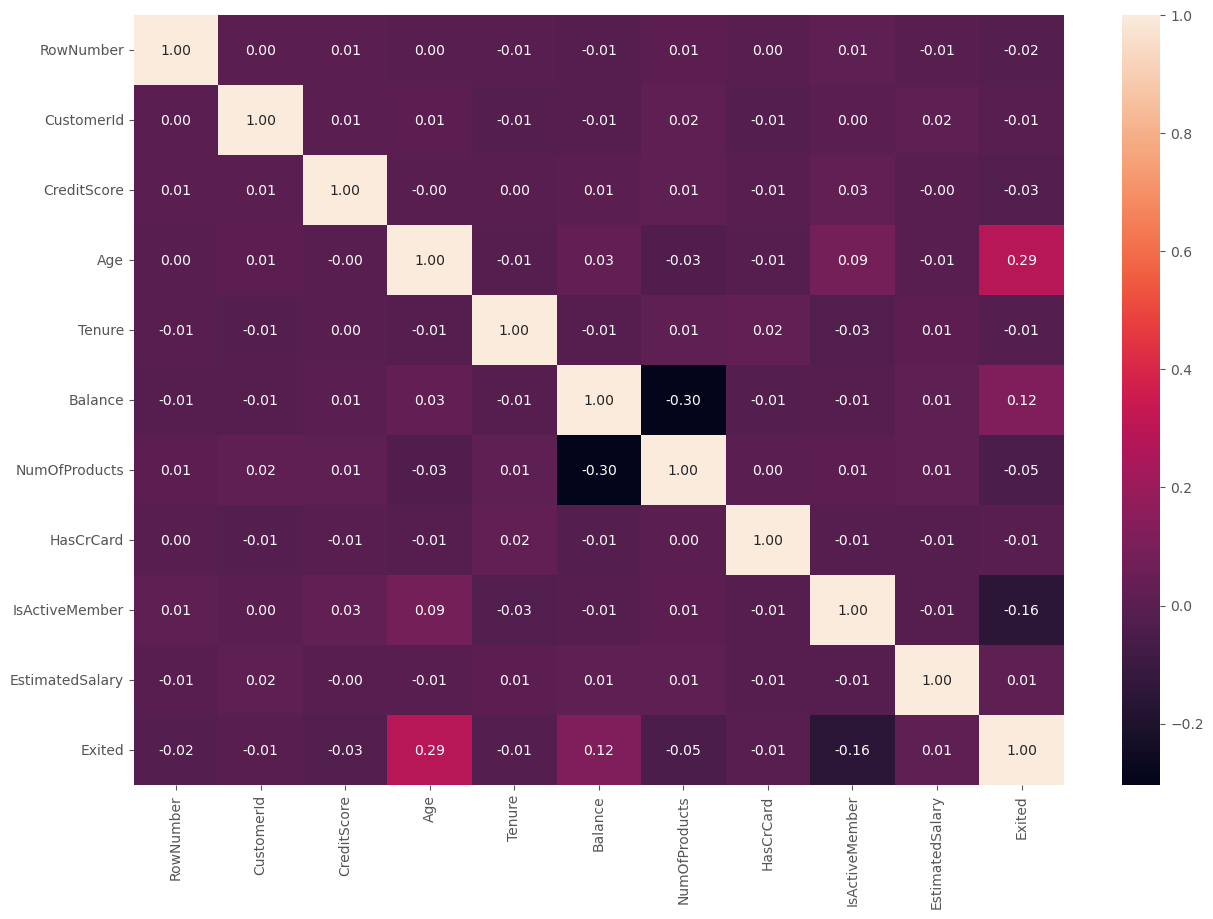

In [54]:
corr = df.corr()

plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, fmt = ".2f")

In [55]:
df.drop(columns = ["RowNumber", "CustomerId", "Surname"], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
df["Geography"] = df["Geography"].map({"France" : 0, "Spain": 1, "Germany" : 2})
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1} )
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


### Data preparation 

In [70]:
from tensorflow.keras.utils import to_categorical, plot_model

X = df.drop("Exited", axis = 1)
y = to_categorical(df.Exited)

In [71]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
X = SS.fit_transform(X)

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Neural Net

In [131]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()

# Input Layer
model.add(layers.Dense(10, activation = 'relu', input_shape = (10, ) ))

model.add(layers.Dropout(rate = 0.1))
model.add(layers.BatchNormalization())

model.add(layers.Dense(6, activation = 'relu' ) )


model.add(layers.Dropout(rate = 0.1))
model.add(layers.BatchNormalization())


# Output layer
model.add(layers.Dense(2, activation = 'relu'))

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [132]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dropout_17 (Dropout)        (None, 10)                0         
                                                                 
 batch_normalization_18 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_27 (Dense)            (None, 6)                 66        
                                                                 
 dropout_18 (Dropout)        (None, 6)                 0         
                                                                 
 batch_normalization_19 (Bat  (None, 6)                24        
 chNormalization)                                    

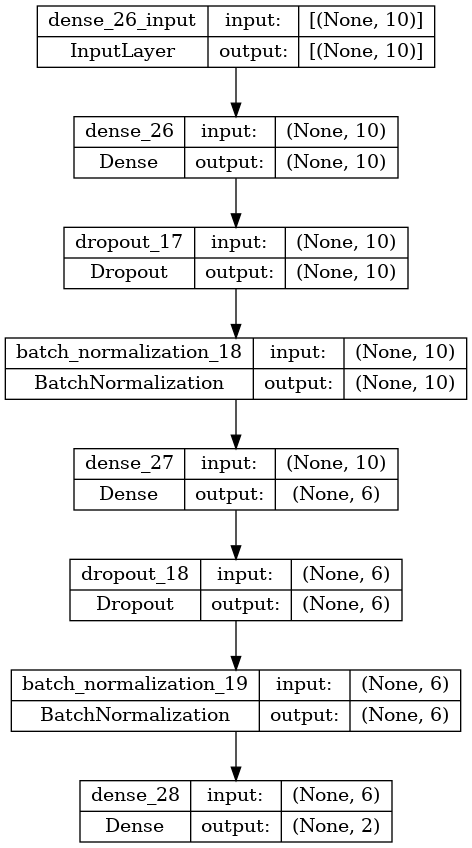

In [133]:
plot_model(model, show_shapes = True)

In [135]:
history = model.fit(X_train, y_train, 
                    epochs = 200,
                    validation_split = 0.2, validation_data = (X_test, y_test),
                   verbose = 1)

Epoch 1/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3938 - accuracy: 0.8313 - val_loss: 0.3647 - val_accuracy: 0.8495
Epoch 2/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3979 - accuracy: 0.8356 - val_loss: 0.3652 - val_accuracy: 0.8495
Epoch 3/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3993 - accuracy: 0.8314 - val_loss: 0.3599 - val_accuracy: 0.8525
Epoch 4/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4004 - accuracy: 0.8296 - val_loss: 0.3756 - val_accuracy: 0.8500
Epoch 5/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4081 - accuracy: 0.8282 - val_loss: 0.3733 - val_accuracy: 0.8505
Epoch 6/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4001 - accuracy: 0.8309 - val_loss: 0.3616 - val_accuracy: 0.8515
Epoch 7/200
250/250 [==============================] - 1s 3ms/step - loss: 0.3998 - accuracy: 0.8286 - val_loss: 0.3606 - val_accuracy: 0.8505

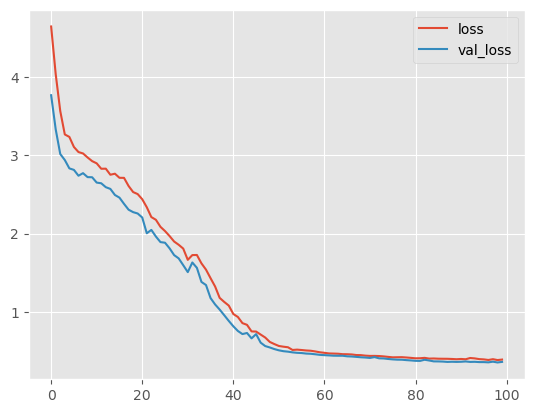

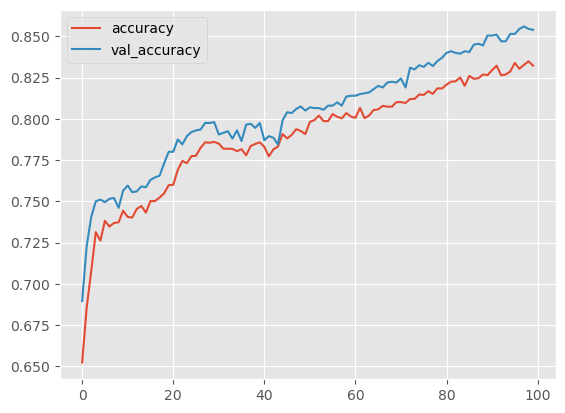

In [129]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [130]:
val = model.evaluate(X_test, y_test)[1]

print("Model Accuracy: ", val)

63/63 [==============================] - 0s 1ms/step - loss: 0.3635 - accuracy: 0.8540
Model Accuracy:  0.8539999723434448
